<a href="https://colab.research.google.com/github/Debottam/MachinLearningEx/blob/master/CustomizedAPi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

print("tf version: ", tf.__version__)
print("keras version: ", keras.__version__)

tf version:  2.3.0
keras version:  2.4.0


In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape
Y_train.shape

(60000,)

In [ ]:
Y_train[0]

5

In [ ]:
#preprocessing
X_train = X_train/255.
X_test = X_test/255.

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=[28,28]),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer='adam', loss = 'mse', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 9         
Total params: 25,793
Trainable params: 25,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2689 - accuracy: 0.1807
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0056 - accuracy: 0.1983
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8093 - accuracy: 0.2010
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6965 - accuracy: 0.2010
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6125 - accuracy: 0.2018
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5456 - accuracy: 0.2024
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5022 - accuracy: 0.2029
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4655 - accuracy: 0.2032
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4375 - accuracy: 0.2039
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.408

In [ ]:
X = X_test[0]
X.shape
X = X.reshape(1,28,28)
X.shape

(1, 28, 28)

In [ ]:
model.predict(X)

array([[6.7597446]], dtype=float32)

In [ ]:
Y_test[0]

7

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

<function matplotlib.pyplot.show>

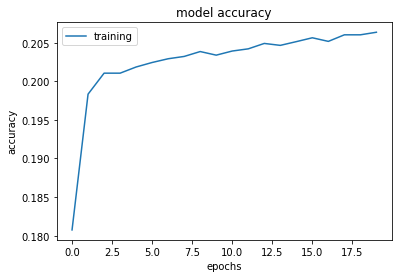

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['training'])
plt.show

<function matplotlib.pyplot.show>

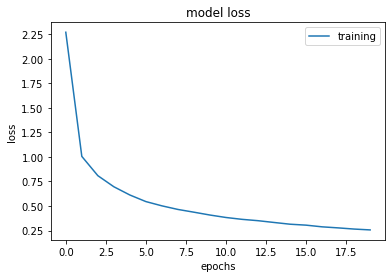

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['training'])
plt.show

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.2066


[0.531632661819458, 0.20659999549388885]

In [ ]:
def mse_fn(y_true, y_pred):
  error = y_true - y_pred
  mserror = tf.reduce_mean(tf.square(error))
  return tf.Tensor(mserror, dtype=float32)

In [ ]:
class mse_fn_class(keras.losses.Loss):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
  def call(self, y_true, y_pred):
    error = y_true - y_pred
    mserror = tf.reduce_mean(tf.square(error))

In [ ]:
class MyDense(keras.layers.Layer):
  def __init__(self, units, activation=None, **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.activation = keras.activations.get(activation)
  
  def build(self, batch_input_shape):
    self.kernel = self.add_weight(name = "kernel", shape=[batch_input_shape[-1], self.units], initializer="glorot_normal")
    self.bias = self.add_weight(name = "bias", shape=[self.units], initializer = 'zeros')
    super().build(batch_input_shape)

  def call(self, X):
    return self.activation(X @ self.kernel + self.bias)
  
  def compute_output_shape(self, batch_input_shape):
    return tf.TensorShape(batch_input_shape.as_list()[:-1]+[self.units])
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, "units":self.units, "activation": keras.activations.serialize(self.activation)}

In [ ]:
class DNN_model(keras.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Flatten(input_shape = [28, 28])
    self.hidden2 = MyDense(32, activation='relu')
    self.hidden3 = MyDense(16, activation='relu')
    self.hidden4 = MyDense(8, activation='relu')
    self.hidden5 = MyDense(output_dim, activation='relu')
  
  def call(self, inputs):
    Z = self.hidden1(inputs)
    Z = self.hidden2(Z)
    Z = self.hidden3(Z)
    Z = self.hidden4(Z)
    Z = self.hidden5(Z)
    return Z

In [ ]:
model_cust = DNN_model(1)

In [ ]:
model_cust.compile(optimizer='adam', loss = 'mse', metrics=['accuracy'])

In [ ]:
input_shape = (None, 28, 28)
model_cust.build(input_shape)
model_cust.summary()

Model: "dnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         multiple                  0         
_________________________________________________________________
my_dense (MyDense)           multiple                  25120     
_________________________________________________________________
my_dense_1 (MyDense)         multiple                  528       
_________________________________________________________________
my_dense_2 (MyDense)         multiple                  136       
_________________________________________________________________
my_dense_3 (MyDense)         multiple                  9         
Total params: 25,793
Trainable params: 25,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_cust.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3923 - accuracy: 0.1678
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0485 - accuracy: 0.1944
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8358 - accuracy: 0.1975
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7230 - accuracy: 0.1996
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6424 - accuracy: 0.2002
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5815 - accuracy: 0.2010
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5249 - accuracy: 0.2023
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4864 - accuracy: 0.2027
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4544 - accuracy: 0.2030
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.419

In [ ]:
model_cust.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 943us/step - loss: 0.5641 - accuracy: 0.2071


[0.5641304850578308, 0.2071000039577484]

In [ ]:
model_cust_loss = DNN_model(1)
model_cust_loss.compile(optimizer='adam', loss = mse_fn, metrics=['accuracy'])

In [ ]:
input_shape = (None, 28, 28)
model_cust_loss.build(input_shape)
model_cust_loss.summary()

Model: "dnn_model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         multiple                  0         
_________________________________________________________________
my_dense_24 (MyDense)        multiple                  25120     
_________________________________________________________________
my_dense_25 (MyDense)        multiple                  528       
_________________________________________________________________
my_dense_26 (MyDense)        multiple                  136       
_________________________________________________________________
my_dense_27 (MyDense)        multiple                  9         
Total params: 25,793
Trainable params: 25,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_cust_loss.fit(X_train, Y_train, epochs=20)

Epoch 1/20


TypeError: ignored